# 68. Conhecendo o Dataset

## Aprendizagem Supervisionada: Regressão
'https://www.kaggle.com/schirmerchad/bostonhoustingmlnd'


In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('D:\\Users\\Nayan Couto\\Cloud Drive\\Documentos\\Arquivos PDF, PPT, DOC\\CURSOS\\Machine Learning com Python\\ML_Jupyter_Anaconda\\Secao_5_AS_Regressao\\Dataset\\housing.csv', sep=',', encoding='iso-8859-1')

In [3]:
df.head(10)

RM  LSTAT  PTRATIO      MEDV
0  6.575   4.98     15.3  504000.0
1  6.421   9.14     17.8  453600.0
2  7.185   4.03     17.8  728700.0
3  6.998   2.94     18.7  701400.0
4  7.147   5.33     18.7  760200.0
5  6.430   5.21     18.7  602700.0
6  6.012  12.43     15.2  480900.0
7  6.172  19.15     15.2  569100.0
8  5.631  29.93     15.2  346500.0
9  6.004  17.10     15.2  396900.0

## Atributos previsores

In [4]:
"""
RM: número médio de cômodos entre os imóveis.
LSTAT: porcentagem de proprietários no bairro considerados de classe baixa.
PTRATIO: razão entre estudantes e professores nas escolas de ensino fundamental e médio.
"""

'\nRM: número médio de cômodos entre os imóveis.\nLSTAT: porcentagem de proprietários no bairro considerados de classe baixa.\nPTRATIO: razão entre estudantes e professores nas escolas de ensino fundamental e médio.\n'

## Variável alvo

In [5]:
"""
MEDV: valor médio das casas.
"""

'\nMEDV: valor médio das casas.\n'

In [6]:
df.shape

(489, 4)

# 69. Exploração, Análise e Tratamento dos dados

## Valores Missing(NAN)

In [7]:
# Relação da quantidade
df.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

In [8]:
# Análise dos atributos
df.dtypes

RM         float64
LSTAT      float64
PTRATIO    float64
MEDV       float64
dtype: object

In [9]:
df.describe()

RM       LSTAT     PTRATIO          MEDV
count  489.000000  489.000000  489.000000  4.890000e+02
mean     6.240288   12.939632   18.516564  4.543429e+05
std      0.643650    7.081990    2.111268  1.653403e+05
min      3.561000    1.980000   12.600000  1.050000e+05
25%      5.880000    7.370000   17.400000  3.507000e+05
50%      6.185000   11.690000   19.100000  4.389000e+05
75%      6.575000   17.120000   20.200000  5.187000e+05
max      8.398000   37.970000   22.000000  1.024800e+06

In [10]:
# Análise dos outliers
import plotly.express as px

In [11]:
boxplot = px.box(df, y="RM")
boxplot.show()

In [12]:
boxplot = px.box(df, y="LSTAT")
boxplot.show()

In [13]:
boxplot = px.box(df, y="PTRATIO")
boxplot.show()

# 70. Correlação Linear: Teoria

## Correlação Linear

In [14]:
"""
> Relação linear entre duas variáveis.
> Determinado através de gráficos de dispersão e do coeficiente de correlação

Coeficiente de Correlação Linear (Coeficiente de Pearson):
> Forma mais precisa de medir correlação entre duas grandezas;
> Teste paramétrico (Normalidade);
r = n*sum(x*y) - sum(x)*sum(y) / (n*sum(x^2) - sum(x)^2)^0.5 * (n*sum(y^2) - sum(y)^2)^0.5

r = 1 ou r = -1     : Correlação Perfeita
0,95 <= r < 1       : Correlação Muito Forte
0,80 <= r < 0,95    : Correlação Forte
0,50 <= r < 0,80    : Correlação Moderada
0 <= r < 0,50       : Correlação Fraca

Coeficiente de determinação (r^2):
> Porcentagem da variação de y que pode ser explicada pela relação de x e y.
> Avalia a qualidade do ajuste de um modelo de regressão.
r^2 = coeficiente de correlação ao quadrado
"""

'\n> Relação linear entre duas variáveis.\n> Determinado através de gráficos de dispersão e do coeficiente de correlação\n\nCoeficiente de Correlação Linear (Coeficiente de Pearson):\n> Forma mais precisa de medir correlação entre duas grandezas;\n> Teste paramétrico (Normalidade);\nr = n*sum(x*y) - sum(x)*sum(y) / (n*sum(x^2) - sum(x)^2)^0.5 * (n*sum(y^2) - sum(y)^2)^0.5\n\nr = 1 ou r = -1     : Correlação Perfeita\n0,95 <= r < 1       : Correlação Muito Forte\n0,80 <= r < 0,95    : Correlação Forte\n0,50 <= r < 0,80    : Correlação Moderada\n0 <= r < 0,50       : Correlação Fraca\n\nCoeficiente de determinação (r^2):\n> Porcentagem da variação de y que pode ser explicada pela relação de x e y.\n> Avalia a qualidade do ajuste de um modelo de regressão.\nr^2 = coeficiente de correlação ao quadrado\n'

In [15]:
def calculate_correlation_coefficient(x, y):
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    numerator = n * np.dot(x, y) - np.sum(x) * np.sum(y)
    denominator = np.sqrt((n * np.dot(x, x) - np.sum(x)**2) * (n * np.dot(y, y) - np.sum(y)**2))
    correlation_value = numerator / denominator
    return correlation_value

# Example usage
x = [2.4, 1.6, 2.0, 2.6, 1.4, 1.6, 2.0, 2.2]
y = [225, 184, 220, 240, 180, 184, 186, 215]
correlation = calculate_correlation_coefficient(x, y)
print(correlation)

0.9129052847122053


## Validação do coeficiente de correlação

In [16]:
"""
> Se |r| > valor da tabela de correlação: coeficiente significante
> Se |r| < valor da tabela de correlação: coeficiente não significante
"""

'\n> Se |r| > valor da tabela de correlação: coeficiente significante\n> Se |r| < valor da tabela de correlação: coeficiente não significante\n'

## Coeficiente de correlação de postos de Spearman

In [17]:
"""
> Teste não paramétrico.
> Medida da força da relação entre duas variáveis.
> Pode ser utilizado na relação de dados lineares e também não lineares, assim como também para dados no nível ordinal.

Cálculo do Coeficiente de Spearman
rR = 1 - 6 * (sum(i=1, n) |x[i]-x[i-1]|^3 + |y[i]-y[i-1]|^3) / (n * (n^2 - 1))

r = 1 ou r = -1     : Correlação Perfeita
0,95 <= r < 1       : Correlação Muito Forte
0,80 <= r < 0,95    : Correlação Forte
0,50 <= r < 0,80    : Correlação Moderada
0 <= r < 0,50       : Correlação Fraca
"""

'\n> Teste não paramétrico.\n> Medida da força da relação entre duas variáveis.\n> Pode ser utilizado na relação de dados lineares e também não lineares, assim como também para dados no nível ordinal.\n\nCálculo do Coeficiente de Spearman\nrR = 1 - 6 * (sum(i=1, n) |x[i]-x[i-1]|^3 + |y[i]-y[i-1]|^3) / (n * (n^2 - 1))\n\nr = 1 ou r = -1     : Correlação Perfeita\n0,95 <= r < 1       : Correlação Muito Forte\n0,80 <= r < 0,95    : Correlação Forte\n0,50 <= r < 0,80    : Correlação Moderada\n0 <= r < 0,50       : Correlação Fraca\n'

## Coeficiente de correlação de Kendall

In [18]:
"""
> Teste não paramétrico indicado para número pequeno de amostras ou para populações com grandes quantidades de empates (valores repetidos).
> Pode ser utilizado juntamente com o Spearman para comparação.
> É mais conservador que p teste de Spearman.

Cálculo do Coeficiente de Kendall
t = (quantidade de pares concordantes) - (quantidade de pares discordantes) / n*(n-1)/2
pares concordantes: pares em que x[i] > x[j] e y[i] > y[j] ou x[i] < x[j] e y[i] < y[j]
pares discordantes: pares em que x[i] > x[j] e y[i] < y[j] ou x[i] < x[j] e y[i] > y[j]

t = 1 ou t = -1     : Correlação Perfeita
0,95 <= t < 1       : Correlação Muito Forte
0,80 <= t < 0,95    : Correlação Forte
0,50 <= t < 0,80    : Correlação Moderada
0 <= t < 0,50       : Correlação Fraca
"""

'\n> Teste não paramétrico indicado para número pequeno de amostras ou para populações com grandes quantidades de empates (valores repetidos).\n> Pode ser utilizado juntamente com o Spearman para comparação.\n> É mais conservador que p teste de Spearman.\n\nCálculo do Coeficiente de Kendall\nt = (quantidade de pares concordantes) - (quantidade de pares discordantes) / n*(n-1)/2\npares concordantes: pares em que x[i] > x[j] e y[i] > y[j] ou x[i] < x[j] e y[i] < y[j]\npares discordantes: pares em que x[i] > x[j] e y[i] < y[j] ou x[i] < x[j] e y[i] > y[j]\n\nt = 1 ou t = -1     : Correlação Perfeita\n0,95 <= t < 1       : Correlação Muito Forte\n0,80 <= t < 0,95    : Correlação Forte\n0,50 <= t < 0,80    : Correlação Moderada\n0 <= t < 0,50       : Correlação Fraca\n'

# 71. Regressão Linear: Teoria

## Regressão Linear Simples

In [19]:
"""
> Modelo matemático linear capaz de realizar previsões.
    y = m*x + b
    m = coeficiente angular
    b = coeficiente linear
    m = (n*sum(x*y) - sum(x)*sum(y)) / (n*sum(x^2) - sum(x)^2)
    b = (sum(y) - m*sum(x)) / n

> Utilizado posteriormente à análise de correlação linear.
> Equação obtida após um ajuste de uma reta no gráfico de dispersão com residuo mínimo (Linha de regressão).

Linhas de regressão
> Linha que melhor se ajusta aos dados plotados, onde a soma dos quadrados dos resíduos seja mínima
"""

'\n> Modelo matemático linear capaz de realizar previsões.\n    y = m*x + b\n    m = coeficiente angular\n    b = coeficiente linear\n    m = (n*sum(x*y) - sum(x)*sum(y)) / (n*sum(x^2) - sum(x)^2)\n    b = (sum(y) - m*sum(x)) / n\n\n> Utilizado posteriormente à análise de correlação linear.\n> Equação obtida após um ajuste de uma reta no gráfico de dispersão com residuo mínimo (Linha de regressão).\n\nLinhas de regressão\n> Linha que melhor se ajusta aos dados plotados, onde a soma dos quadrados dos resíduos seja mínima\n'

In [20]:
def linear_regression(x, y):
    x = np.array(x)  # Convert x to a NumPy array
    y = np.array(y)  # Convert y to a NumPy array
    n = len(x)
    m = (n * np.dot(x, y) - np.sum(x) * np.sum(y)) / (n * np.sum(x**2) - np.sum(x)**2)
    b = (np.sum(y) - m * np.sum(x)) / n
    y_pred = m * x + b
    return y_pred, m, b

lr, ca, cl = linear_regression(x, y)
print(f'Coeficiente angular: {ca}, Coeficiente linear: {cl}, y = {ca}x + {cl} = {lr}')

Coeficiente angular: 50.7287449392715, Coeficiente linear: 104.06072874493879, y = 50.7287449392715x + 104.06072874493879 = [225.8097166  185.22672065 205.51821862 235.95546559 175.08097166
 185.22672065 205.51821862 215.66396761]


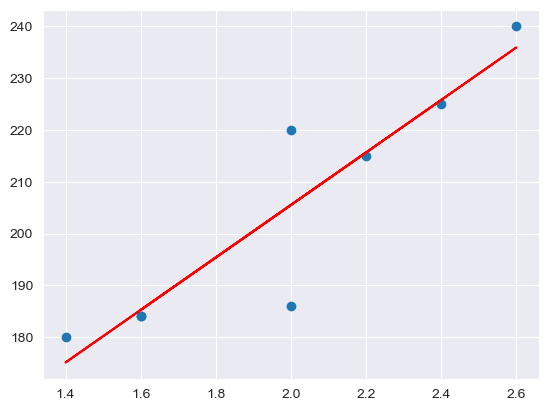

In [21]:
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.plot(x, lr, color='red')
plt.show()

In [22]:
print(f'R² = {pow(calculate_correlation_coefficient(x, y), 2)}')

R² = 0.8333960588554726


## Regressão Linear Múltipla

In [23]:
"""
> Quando possuí mais de uma variável independente.
y = b0 + b1*x1 + b2*x2 + ... + bn*xn + e, onde:
e = erro

> Utiliza-se o método dos mínimos quadrados para estimar os coeficientes da regressão múltipla, sendo que o ideal é usar tecnologia.
Após a obtenção dos coeficientes e, consequentemente, a equação da regressão linear múltipla, aí sim será possível a realização das previsões.
"""

'\n> Quando possuí mais de uma variável independente.\ny = b0 + b1*x1 + b2*x2 + ... + bn*xn + e, onde:\ne = erro\n\n> Utiliza-se o método dos mínimos quadrados para estimar os coeficientes da regressão múltipla, sendo que o ideal é usar tecnologia.\nApós a obtenção dos coeficientes e, consequentemente, a equação da regressão linear múltipla, aí sim será possível a realização das previsões.\n'

# 72. Correlação Linear no Python

In [24]:
df.head(2)

RM  LSTAT  PTRATIO      MEDV
0  6.575   4.98     15.3  504000.0
1  6.421   9.14     17.8  453600.0

## Atributos previsores

In [25]:
"""
RM: número médio de cômodos entre os imóveis.
LSTAT: porcentagem de proprietários no bairro considerados de classe baixa.
PTRATIO: razão entre estudantes e professores nas escolas de ensino fundamental e médio.
"""

'\nRM: número médio de cômodos entre os imóveis.\nLSTAT: porcentagem de proprietários no bairro considerados de classe baixa.\nPTRATIO: razão entre estudantes e professores nas escolas de ensino fundamental e médio.\n'

## Variável alvo

In [26]:
""" MEDV: valor médio das casas. """

' MEDV: valor médio das casas. '

In [27]:
import matplotlib.pyplot as plt

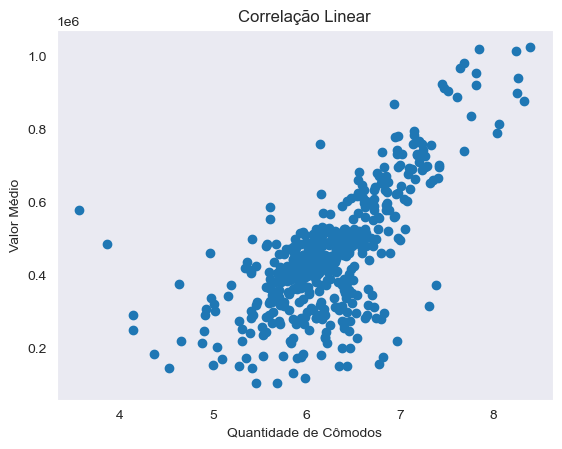

In [28]:
plt.scatter(df.RM, df.MEDV)
plt.title('Correlação Linear')
plt.xlabel('Quantidade de Cômodos')
plt.ylabel('Valor Médio')
plt.grid(False)
plt.show()

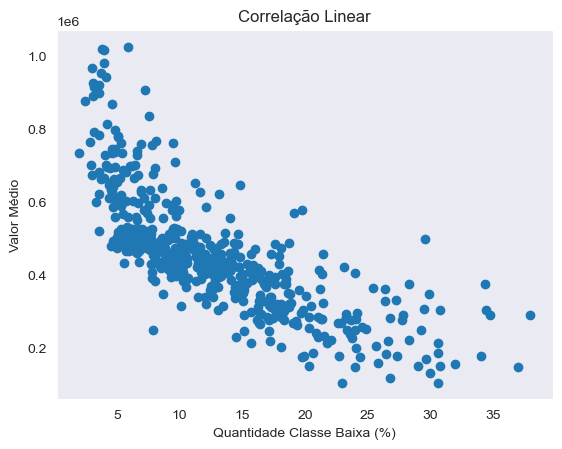

In [29]:
plt.scatter(df.LSTAT, df.MEDV)
plt.title('Correlação Linear')
plt.xlabel('Quantidade Classe Baixa (%)')
plt.ylabel('Valor Médio')
plt.grid(False)
plt.show()

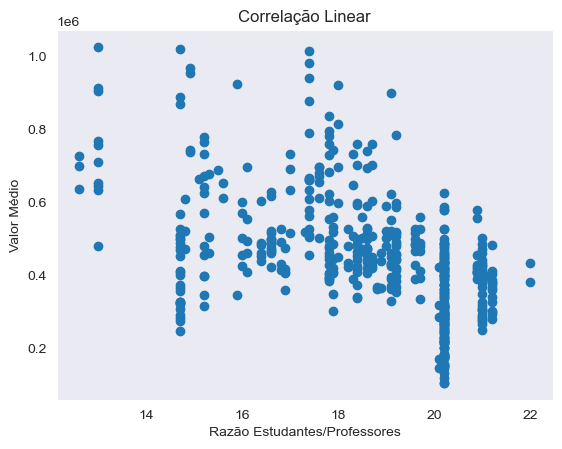

In [30]:
plt.scatter(df.PTRATIO, df.MEDV)
plt.title('Correlação Linear')
plt.xlabel('Razão Estudantes/Professores')
plt.ylabel('Valor Médio')
plt.grid(False)
plt.show()

In [31]:
import seaborn as sns

C:\Users\Nayan Couto\.conda\envs\POO\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Nayan Couto\.conda\envs\POO\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Nayan Couto\.conda\envs\POO\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Nayan Couto\.conda\envs\POO\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



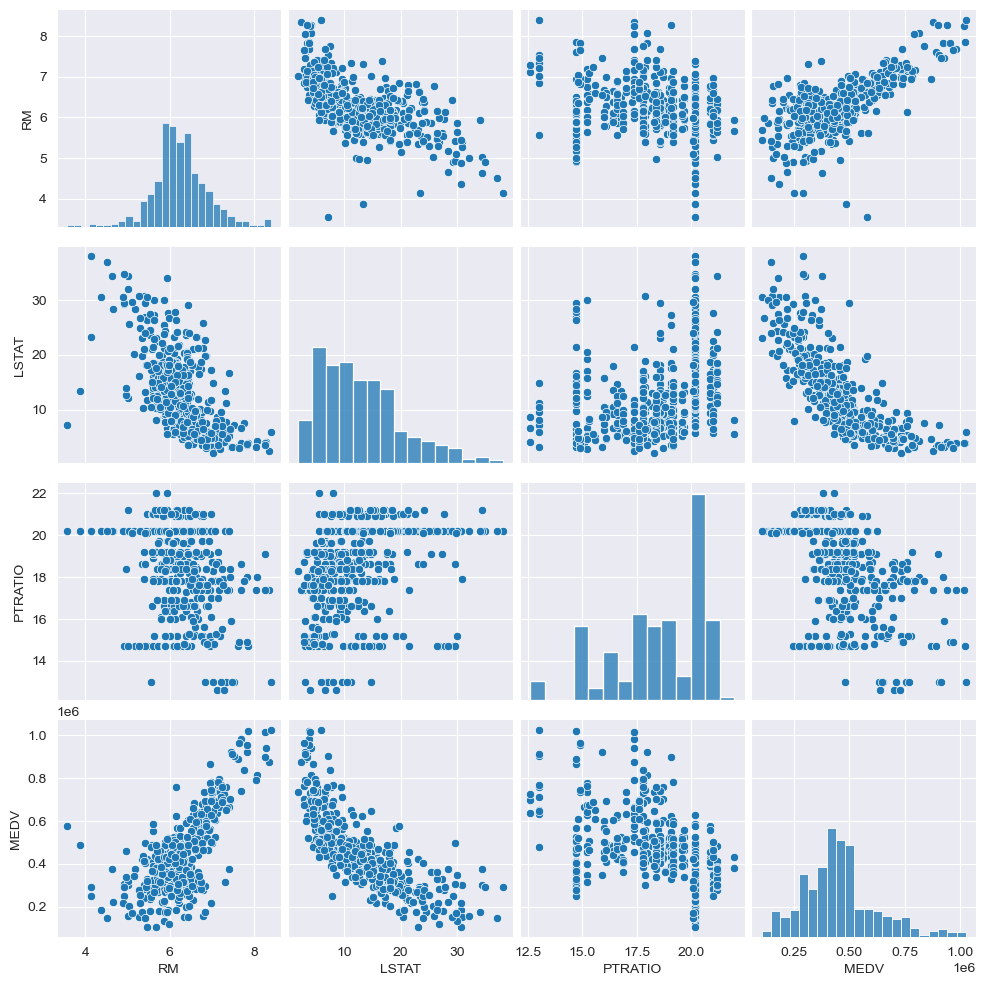

In [32]:
sns.pairplot(df)
plt.show()

## Análise da Normalidade
'Gráfico QQ Plot'

In [33]:
import scipy.stats as stats

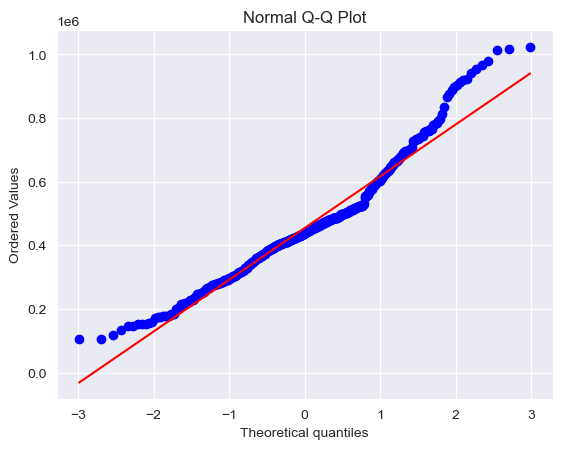

In [34]:
stats.probplot(df['MEDV'], dist='norm', plot=plt)
plt.title("Normal Q-Q Plot")
plt.show()

In [35]:
import plotly.express as px

In [36]:
hist = px.histogram(df, x='MEDV', nbins=60)
hist.update_layout(width=800, height=600, title_text='Média de Valores')
hist.show()

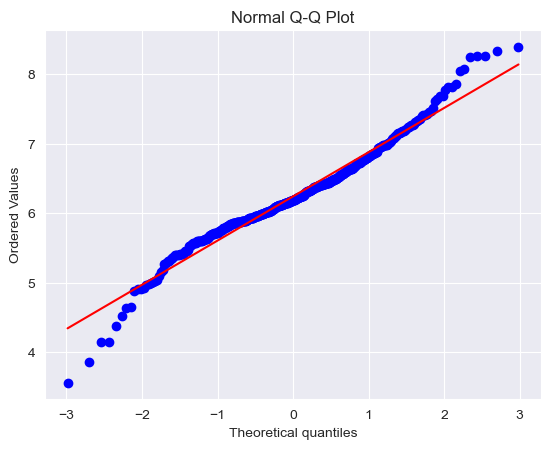

In [37]:
stats.probplot(df.RM, dist='norm', plot=plt)
plt.title("Normal Q-Q Plot")
plt.show()

In [38]:
hist = px.histogram(df, x='RM', nbins=60)
hist.update_layout(width=800, height=600, title_text='Quantidade de Cômodos')
hist.show()

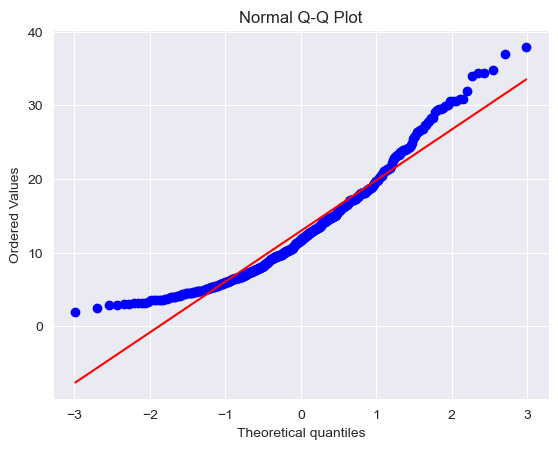

In [39]:
stats.probplot(df.LSTAT, dist='norm', plot=plt)
plt.title("Normal Q-Q Plot")
plt.show()

In [40]:
hist = px.histogram(df, x='LSTAT', nbins=60)
hist.update_layout(width=800, height=600, title_text='Porcentagem Classe Baixa (%)')
hist.show()

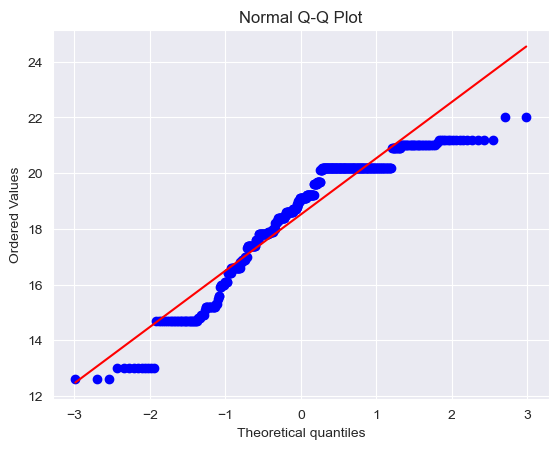

In [41]:
stats.probplot(df.PTRATIO, dist='norm', plot=plt)
plt.title("Normal Q-Q Plot")
plt.show()

In [42]:
hist = px.histogram(df, x='PTRATIO', nbins=60)
hist.update_layout(width=800, height=600, title_text='Razão Estudantes/Professores')
hist.show()

## Teste Shapiro-Wilk

In [43]:
"""
H0 = Distribuição normal: p > 0,05
H1 = Distribuição não normal: p <= 0,05
"""

'\nH0 = Distribuição normal: p > 0,05\nH1 = Distribuição não normal: p <= 0,05\n'

In [44]:
stats.shapiro(df.MEDV) # limitação até 5 mil registros

ShapiroResult(statistic=0.9596616055953767, pvalue=2.5759801704018553e-10)

In [45]:
estatistica, p = stats.shapiro(df.MEDV)
print(f'Estatística: {estatistica}, P-valor: {p}')

Estatística: 0.9596616055953767, P-valor: 2.5759801704018553e-10


In [46]:
if p > 0.05:
    print('Distribuição normal')
else:
    print('Distribuição não normal')

Distribuição não normal


In [47]:
stats.shapiro(df.RM) # limitação até 5 mil registros

ShapiroResult(statistic=0.9708170375303297, pvalue=2.7090145811327798e-08)

In [48]:
estatistica, p = stats.shapiro(df.RM)
print(f'Estatística: {estatistica}, P-valor: {p}')

Estatística: 0.9708170375303297, P-valor: 2.7090145811327798e-08


In [49]:
if p > 0.05:
    print('Distribuição normal')
else:
    print('Distribuição não normal')

Distribuição não normal


In [50]:
stats.shapiro(df.LSTAT) # limitação até 5 mil registros

ShapiroResult(statistic=0.9371757140975832, pvalue=1.689879707182205e-13)

In [51]:
estatistica, p = stats.shapiro(df.LSTAT)
print(f'Estatística: {estatistica}, P-valor: {p}')

Estatística: 0.9371757140975832, P-valor: 1.689879707182205e-13


In [52]:
if p > 0.05:
    print('Distribuição normal')
else:
    print('Distribuição não normal')

Distribuição não normal


In [53]:
stats.shapiro(df.PTRATIO) # limitação até 5 mil registros

ShapiroResult(statistic=0.90647424903615, pvalue=9.064596547331122e-17)

In [54]:
estatistica, p = stats.shapiro(df.PTRATIO)
print(f'Estatística: {estatistica}, P-valor: {p}')

Estatística: 0.90647424903615, P-valor: 9.064596547331122e-17


In [55]:
if p > 0.05:
    print('Distribuição normal')
else:
    print('Distribuição não normal')

Distribuição não normal


## Teste Lilliefors (Kolmogorov-Smirnov)

In [56]:
"""
H0 = Distribuição normal: p > 0,05
H1 = Distribuição não normal: p <= 0,05
"""

'\nH0 = Distribuição normal: p > 0,05\nH1 = Distribuição não normal: p <= 0,05\n'

In [57]:
import statsmodels
from statsmodels.stats.diagnostic import lilliefors

In [58]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(df.MEDV, dist='norm')
print(f'Estatística: {estatistica}, P-valor: {p}')

Estatística: 0.11370576407672117, P-valor: 0.0009999999999998899


In [59]:
if p > 0.05:
    print('Distribuição normal')
else:
    print('Distribuição não normal')

Distribuição não normal


In [60]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(df.RM, dist='norm')
print(f'Estatística: {estatistica}, P-valor: {p}')

Estatística: 0.06394344399233598, P-valor: 0.0009999999999998899


In [61]:
if p > 0.05:
    print('Distribuição normal')
else:
    print('Distribuição não normal')

Distribuição não normal


In [62]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(df.LSTAT, dist='norm')
print(f'Estatística: {estatistica}, P-valor: {p}')

Estatística: 0.0880483807304932, P-valor: 0.0009999999999998899


In [63]:
if p > 0.05:
    print('Distribuição normal')
else:
    print('Distribuição não normal')

Distribuição não normal


In [64]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(df.PTRATIO, dist='norm')
print(f'Estatística: {estatistica}, P-valor: {p}')

Estatística: 0.17592642312750062, P-valor: 0.0009999999999998899


In [65]:
if p > 0.05:
    print('Distribuição normal')
else:
    print('Distribuição não normal')

Distribuição não normal


## Correlação Linear

In [66]:
"""
Pearson (distribuição normal)
Spearman (distribuição não normal)
Kendall (distribuição não normal com quantidade pequena de amostras)

H0 = Correlação linear: p > 0,05
H1 = Correlação não linear: p <= 0,05
"""

'\nPearson (distribuição normal)\nSpearman (distribuição não normal)\nKendall (distribuição não normal com quantidade pequena de amostras)\n\nH0 = Correlação linear: p > 0,05\nH1 = Correlação não linear: p <= 0,05\n'

In [67]:
# Pearson
#coef, p = stats.pearsonr(df.MEDV, df.RM)
#print(f'Coeficiente: {coef}, P-valor: {p}')

In [68]:
# Spearman
coef, p = stats.spearmanr(df.MEDV, df.RM)
print(f'Coeficiente: {coef}, P-valor: {p}')

Coeficiente: 0.6240572939087418, P-valor: 3.845028634343325e-54


In [69]:
# Kendall
#coef, p = stats.kendalltau(df.MEDV, df.RM)
#print(f'Coeficiente: {coef}, P-valor: {p}')

In [70]:
correlacoes = df.corr(method='spearman')
correlacoes

RM     LSTAT   PTRATIO      MEDV
RM       1.000000 -0.624700 -0.282053  0.624057
LSTAT   -0.624700  1.000000  0.461739 -0.845527
PTRATIO -0.282053  0.461739  1.000000 -0.559276
MEDV     0.624057 -0.845527 -0.559276  1.000000

In [71]:
# Spearman
coef, p = stats.spearmanr(df.MEDV, df.LSTAT)
print(f'Coeficiente: {coef}, P-valor: {p}')

Coeficiente: -0.8455267494054259, P-valor: 8.25183845003003e-135


In [72]:
# Spearman
coef, p = stats.spearmanr(df.MEDV, df.PTRATIO)
print(f'Coeficiente: {coef}, P-valor: {p}')

Coeficiente: -0.5592761164167336, P-valor: 1.3794858687631326e-41


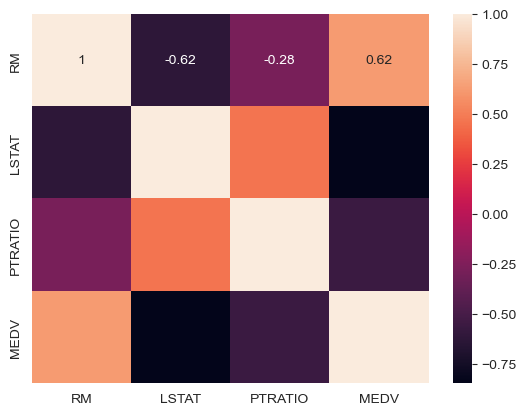

In [73]:
plt.figure()
sns.heatmap(correlacoes, annot=True)
plt.show()

# 73. Regressão Linear no Python

## Regressão Linear Simples
'https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html'

In [74]:
# Valor Médio (MEDV) em função do número de quartos (RM)
df.head(2)

RM  LSTAT  PTRATIO      MEDV
0  6.575   4.98     15.3  504000.0
1  6.421   9.14     17.8  453600.0

In [75]:
x1 = df.iloc[:, 0:1].values
x1

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147],
       [6.43 ],
       [6.012],
       [6.172],
       [5.631],
       [6.004],
       [6.377],
       [6.009],
       [5.889],
       [5.949],
       [6.096],
       [5.834],
       [5.935],
       [5.99 ],
       [5.456],
       [5.727],
       [5.57 ],
       [5.965],
       [6.142],
       [5.813],
       [5.924],
       [5.599],
       [5.813],
       [6.047],
       [6.495],
       [6.674],
       [5.713],
       [6.072],
       [5.95 ],
       [5.701],
       [6.096],
       [5.933],
       [5.841],
       [5.85 ],
       [5.966],
       [6.595],
       [7.024],
       [6.77 ],
       [6.169],
       [6.211],
       [6.069],
       [5.682],
       [5.786],
       [6.03 ],
       [5.399],
       [5.602],
       [5.963],
       [6.115],
       [6.511],
       [5.998],
       [5.888],
       [7.249],
       [6.383],
       [6.816],
       [6.145],
       [5.927],
       [5.741],
       [5.966],
       [

In [76]:
y= df.iloc[:, 3].values
y

array([ 504000.,  453600.,  728700.,  701400.,  760200.,  602700.,
        480900.,  569100.,  346500.,  396900.,  315000.,  396900.,
        455700.,  428400.,  382200.,  417900.,  485100.,  367500.,
        424200.,  382200.,  285600.,  411600.,  319200.,  304500.,
        327600.,  291900.,  348600.,  310800.,  386400.,  441000.,
        266700.,  304500.,  277200.,  275100.,  283500.,  396900.,
        420000.,  441000.,  518700.,  646800.,  732900.,  558600.,
        531300.,  518700.,  445200.,  405300.,  420000.,  348600.,
        302400.,  407400.,  413700.,  430500.,  525000.,  491400.,
        396900.,  743400.,  518700.,  663600.,  489300.,  411600.,
        392700.,  336000.,  466200.,  525000.,  693000.,  493500.,
        407400.,  462000.,  365400.,  438900.,  508200.,  455700.,
        478800.,  491400.,  506100.,  449400.,  420000.,  436800.,
        445200.,  426300.,  588000.,  501900.,  520800.,  480900.,
        501900.,  558600.,  472500.,  466200.,  495600.,  6027

In [77]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x1, y, test_size=0.3, random_state=100)

In [78]:
x_treino.shape, y_treino.shape

((342, 1), (342,))

In [79]:
x_teste.shape, y_teste.shape

((147, 1), (147,))

In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
reg_linear1 = LinearRegression()
reg_linear1.fit(x_treino, y_treino)

LinearRegression()

In [82]:
reg_linear1.intercept_

-655851.7249969809

In [83]:
reg_linear1.coef_

array([178205.10079184])

In [84]:
# Equação resultante: - 655851,72 + 178205,10 * numero de quartos

In [85]:
# Coeficiente de Determinação (R²) treino
reg_linear1.score(x_treino, y_treino)

0.48198872122841996

In [86]:
# Coeficiente de Determinação (R²) teste
reg_linear1.score(x_teste, y_teste)

0.4878501876228124

In [87]:
previsoes_treino = reg_linear1.predict(x_treino)
previsoes_treino

array([610117.31102828, 490007.07309458, 399122.47169074, 594078.85195702,
       499273.73833576, 358669.91381099, 401795.54820262, 585881.41732059,
       390034.01155035, 564675.01032636, 542933.98802976, 624551.92419242,
       393954.52376778, 480205.79255103, 356709.65770228, 490719.89349775,
       427813.49291823, 421754.5194913 , 448128.8744085 , 425140.41640635,
       401973.75330341, 414091.70015725, 335859.66090963, 304673.76827106,
       316078.89472174, 370075.04026167, 452405.7968275 , 521014.76063236,
       633640.38433281, 350650.68427536, 639164.74245735, 439040.41426811,
       346908.37715873, 417121.18687071, 343522.48024368, 383796.83302264,
       471473.74261223, 367223.758649  , 521371.17083394, 453653.23253304,
       817191.63814841, 504263.48115793, 454366.05293621, 341918.63433656,
       469513.48650352, 418725.03277784, 370431.45046325, 472721.17831777,
       418725.03277784, 400369.90739628, 307168.63968215, 592831.41625147,
       511213.48008881, 4

In [88]:
import matplotlib.pyplot as plt

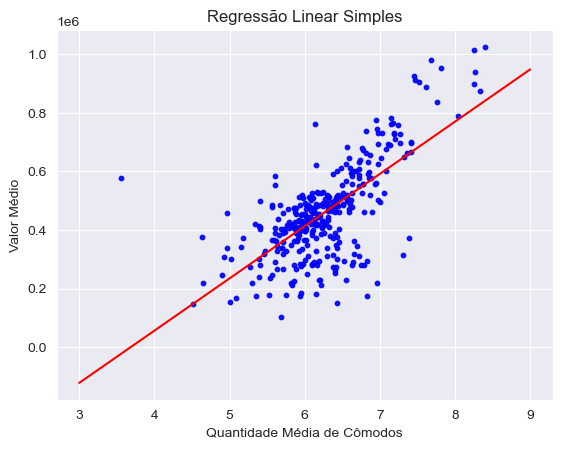

In [89]:
plt.scatter(y=y_treino, x=x_treino, color='blue', s=10, alpha=0.9)
X_plot = np.linspace(3, 9)
plt.plot(X_plot, X_plot*reg_linear1.coef_ + reg_linear1.intercept_, color='red')
plt.title('Regressão Linear Simples')
plt.ylabel('Valor Médio')
plt.xlabel('Quantidade Média de Cômodos')
plt.show()

In [90]:
previsoes_teste = reg_linear1.predict(x_teste)
previsoes_teste

array([583921.16121188, 378272.47489809, 565566.03583032, 782085.23329241,
       480383.99765182, 540795.52682026, 437792.97856257, 588019.87853009,
       411062.21344379, 487690.40678429, 378985.29530126, 499808.35363813,
        81560.98207967, 743592.93152137, 393419.9084654 , 442248.10608237,
        32554.57936191, 390568.62685273, 511748.09539118, 315900.68962095,
       308950.69069007, 370075.04026167, 533489.11768779, 483769.89456686,
       386648.11463531, 407676.31652875, 474503.22932569, 458108.36005284,
       241589.16259075, 381658.37181314, 289348.12960296, 340849.40373181,
       481096.81805499, 451158.36112196, 400191.70229549, 430308.36432931,
       413913.49505646, 450445.54071879, 523509.63204345, 409101.95733508,
       394845.54927173, 620631.411975  , 435119.90205069, 418903.23787863,
       526539.11875691, 218422.49948781, 619205.77116867, 327840.431374  ,
       500699.37914209, 484304.50986924, 610651.92633066, 650926.27910962,
       438684.00406653, 4

In [91]:
y_teste

array([ 621600.,  352800.,  672000.,  812700.,  485100.,  478800.,
        405300.,  781200.,  117600.,  474600.,  470400.,  323400.,
        289800., 1018500.,  396900.,  506100.,  485100.,  428400.,
        661500.,  105000.,  147000.,  315000.,  441000.,  455700.,
        441000.,  392700.,  151200.,  264600.,  203700.,  386400.,
        252000.,  369600.,  199500.,  373800.,  401100.,  422100.,
        401100.,  245700.,  632100.,  266700.,  174300.,  663600.,
        451500.,  407400.,  514500.,  289800.,  795900.,  258300.,
        480900.,  525000.,  636300.,  756000.,  319200.,  415800.,
        739200.,  184800.,  321300.,  609000.,  617400.,  300300.,
        399000.,  312900.,  436800.,  438900.,  518700.,  867300.,
        407400.,  695100.,  151200.,  304500.,  323400.,  285600.,
        357000.,  247800.,  501900.,  449400.,  466200.,  569100.,
        157500.,  455700.,  132300.,  214200.,  359100.,  304500.,
        384300.,  438900.,  294000.,  422100.,  518700.,  6993

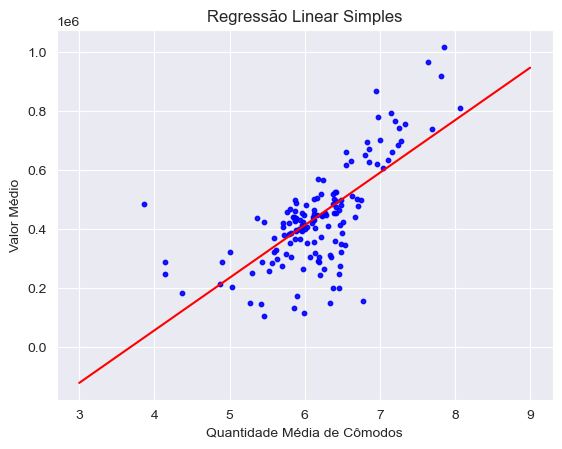

In [92]:
plt.scatter(y=y_teste, x=x_teste, color='blue', s=10, alpha=0.9)
X_plot = np.linspace(3, 9)
plt.plot(X_plot, X_plot*reg_linear1.coef_ + reg_linear1.intercept_, color='red')
plt.title('Regressão Linear Simples')
plt.ylabel('Valor Médio')
plt.xlabel('Quantidade Média de Cômodos')
plt.show()

In [93]:
# Fazendo previsões para valores distintos
valor_casa = reg_linear1.predict([[4]])
valor_casa

array([56968.6781704])

## Métricas de Desempenho

In [94]:
# Erro absoluto
abs(y_teste - previsoes_teste).mean()

87482.8753264328

In [95]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [96]:
# Erro médio absoluto
mean_absolute_error(y_teste, previsoes_teste)

87482.8753264328

In [97]:
# Erro quadrático medio
mean_squared_error(y_teste, previsoes_teste)

14940997482.420193

In [98]:
# Raiz do erro quadrático medio
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

122233.37303052793

# 74. Regressão Linear no Python: parte 2

## Valor médio (MEDV) em função da classe social (LSTAT)

In [99]:
df.head(2)

RM  LSTAT  PTRATIO      MEDV
0  6.575   4.98     15.3  504000.0
1  6.421   9.14     17.8  453600.0

In [100]:
x2 = df.iloc[:, 1:2].values
x2

array([[ 4.98],
       [ 9.14],
       [ 4.03],
       [ 2.94],
       [ 5.33],
       [ 5.21],
       [12.43],
       [19.15],
       [29.93],
       [17.1 ],
       [20.45],
       [13.27],
       [15.71],
       [ 8.26],
       [10.26],
       [ 8.47],
       [ 6.58],
       [14.67],
       [11.69],
       [11.28],
       [21.02],
       [13.83],
       [18.72],
       [19.88],
       [16.3 ],
       [16.51],
       [14.81],
       [17.28],
       [12.8 ],
       [11.98],
       [22.6 ],
       [13.04],
       [27.71],
       [18.35],
       [20.34],
       [ 9.68],
       [11.41],
       [ 8.77],
       [10.13],
       [ 4.32],
       [ 1.98],
       [ 4.84],
       [ 5.81],
       [ 7.44],
       [ 9.55],
       [10.21],
       [14.15],
       [18.8 ],
       [30.81],
       [16.2 ],
       [13.45],
       [ 9.43],
       [ 5.28],
       [ 8.43],
       [14.8 ],
       [ 4.81],
       [ 5.77],
       [ 3.95],
       [ 6.86],
       [ 9.22],
       [13.15],
       [14.44],
       [

In [101]:
y= df.iloc[:, 3].values
y

array([ 504000.,  453600.,  728700.,  701400.,  760200.,  602700.,
        480900.,  569100.,  346500.,  396900.,  315000.,  396900.,
        455700.,  428400.,  382200.,  417900.,  485100.,  367500.,
        424200.,  382200.,  285600.,  411600.,  319200.,  304500.,
        327600.,  291900.,  348600.,  310800.,  386400.,  441000.,
        266700.,  304500.,  277200.,  275100.,  283500.,  396900.,
        420000.,  441000.,  518700.,  646800.,  732900.,  558600.,
        531300.,  518700.,  445200.,  405300.,  420000.,  348600.,
        302400.,  407400.,  413700.,  430500.,  525000.,  491400.,
        396900.,  743400.,  518700.,  663600.,  489300.,  411600.,
        392700.,  336000.,  466200.,  525000.,  693000.,  493500.,
        407400.,  462000.,  365400.,  438900.,  508200.,  455700.,
        478800.,  491400.,  506100.,  449400.,  420000.,  436800.,
        445200.,  426300.,  588000.,  501900.,  520800.,  480900.,
        501900.,  558600.,  472500.,  466200.,  495600.,  6027

In [102]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x2, y, test_size=0.3, random_state=10)

In [103]:
x_treino.shape, y_treino.shape

((342, 1), (342,))

In [104]:
x_teste.shape, y_teste.shape

((147, 1), (147,))

In [105]:
from sklearn.linear_model import LinearRegression

In [106]:
reg_linear2 = LinearRegression()
reg_linear2.fit(x_treino, y_treino)

LinearRegression()

In [107]:
# Intercepto
reg_linear2.intercept_

681977.7451055486

In [108]:
# Coeficiente
reg_linear2.coef_

array([-17263.75010515])

In [109]:
# Coeficiente de Determinação (R²) treino
reg_linear2.score(x_treino, y_treino)

0.5688289563355992

In [110]:
# Coeficiente de Determinação (R²) teste
reg_linear2.score(x_teste, y_teste)

0.6006038196307664

In [111]:
# Equação resultante: 681977,75 - 17263,75 * LSTAT

In [112]:
previsoes_treino = reg_linear2.predict(x_treino)
previsoes_treino

array([549564.78179906, 401787.080899  , 547493.13178645, 392982.56834537,
       594968.4445756 , 475330.65634693, 474294.83134062, 172179.20450053,
       525050.25664975, 358109.79313297, 527812.45666658, 386940.25580857,
       595141.08207665, 451851.95620393, 590825.14455037, 383660.14328859,
       624489.45725541, 543004.55675911, 413526.4309705 , 422676.21852623,
       572180.29443681, 457548.99373862, 507095.9565404 , 397643.78087376,
       492594.40645207, 610505.81967024, 365533.20567819, 611541.64467654,
       527639.81916553, 401959.71840005, 578740.51947676, 435624.03110509,
       370021.78070552, 342054.50553518, 530229.3816813 , 587027.11952723,
       274553.24262406, 554743.90683061, 563548.41938423, 562339.95687687,
       420086.65601045, 613785.93219021, 536271.6942181 , 515555.19409192,
       280250.28015875, 437005.1311135 , 499672.54399519, 541105.54424754,
       359836.16814349, 475158.01884588, 422676.21852623, 533336.85670022,
       579948.98198412, 5

In [113]:
import matplotlib.pyplot as plt

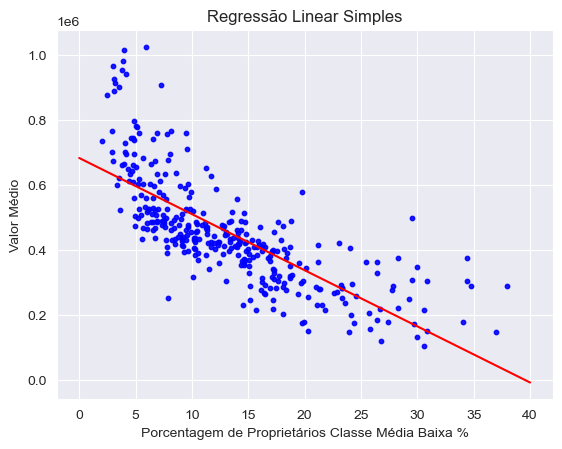

In [114]:
plt.scatter(y=y_treino, x=x_treino, color='blue', s=10, alpha=0.9)
X_plot = np.linspace(0, 40)
plt.plot(X_plot, X_plot*reg_linear2.coef_ + reg_linear2.intercept_, color='red')
plt.title('Regressão Linear Simples')
plt.ylabel('Valor Médio')
plt.xlabel('Porcentagem de Proprietários Classe Média Baixa %')
plt.show()

In [115]:
previsoes_teste = reg_linear2.predict(x_teste)
previsoes_teste

array([507441.2315425 , 438731.50612401, 518490.0316098 , 500708.36900149,
       594277.8945714 , 539897.08174018, 551981.70681378, 483789.89389845,
       580121.61948518, 272999.50511459, 558714.56935479, 553535.44432325,
       584610.19451251, 472395.81882905, 370194.41820658, 454959.43122285,
       496565.06897626, 474122.19383957, 363288.91816452, 348614.73057514,
       426646.88105041, 472741.09383115, 480855.05638057, 506578.04403724,
       357419.24312877, 570108.64442419, 573388.75694417, 447018.10617448,
       620346.15723017, 353793.85560668, 452887.78121023, 521770.14412977,
       562512.59437792, 420949.84351571, 591343.05705352, 378135.74325494,
       602737.13212292, 400578.61839164, 394536.30585483, 558024.01935059,
       180465.804551  , 557678.74434848, 567691.71940947, 603255.04462607,
       551463.79431063, 587199.75702829, 474294.83134062, 365360.56817713,
       490350.11893841, 601356.03211451, 351376.93059196, 300276.23028073,
       271273.13010408, 4

In [116]:
y_teste

array([ 487200.,  428400.,  525000.,  483000.,  516600.,  462000.,
        592200.,  476700.,  512400.,  275100.,  487200.,  518700.,
        501900.,  499800.,  319200.,  621600.,  483000.,  445200.,
        373800.,  273000.,  644700.,  321300.,  510300.,  478800.,
        348600.,  462000.,  516600.,  405300.,  919800.,  266700.,
        455700.,  499800.,  627900.,  357000.,  665700.,  373800.,
        867300.,  327600.,  327600.,  501900.,  151200.,  499800.,
        726600.,  625800.,  835800.,  686700.,  338100.,  300300.,
        499800.,  493500.,  569100.,  220500.,  226800.,  411600.,
        478800.,  241500.,  655200.,  432600.,  441000.,  405300.,
        462000.,  252000.,  495600.,  577500.,  512400.,  392700.,
        279300.,  480900.,  497700.,  554400.,  399000.,  369600.,
        315000.,  445200.,  585900.,  105000.,  388500.,  453600.,
        312900.,  336000.,  315000.,  501900.,  323400.,  476700.,
        382200.,  609000.,  390600.,  413700.,  426300.,  2835

In [117]:
# Coeficiente de Determinação (R²) teste
reg_linear2.score(x_teste, y_teste)

0.6006038196307664

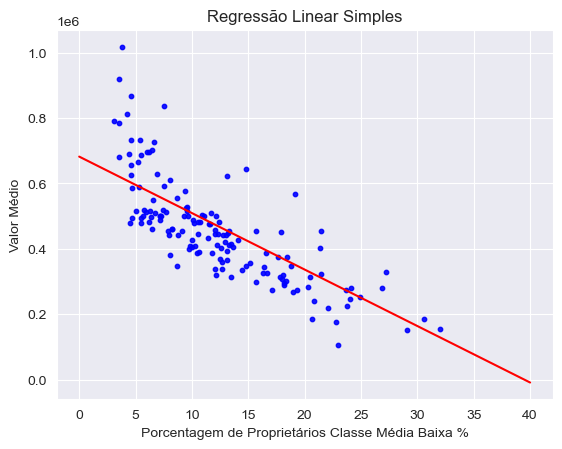

In [118]:
plt.scatter(y=y_teste, x=x_teste, color='blue', s=10, alpha=0.9)
X_plot = np.linspace(0, 40)
plt.plot(X_plot, X_plot*reg_linear2.coef_ + reg_linear2.intercept_, color='red')
plt.title('Regressão Linear Simples')
plt.ylabel('Valor Médio')
plt.xlabel('Porcentagem de Proprietários Classe Média Baixa %')
plt.show()

In [119]:
# Fazendo previsões para valores distintos
valor_casa = reg_linear2.predict([[35]])
valor_casa

array([77746.49142537])

In [120]:
# Métricas de Desempenho

In [121]:
# Erro absoluto
abs(y_teste - previsoes_teste).mean()

76340.55192245146

In [122]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [123]:
# Erro médio absoluto
mean_absolute_error(y_teste, previsoes_teste)

76340.55192245146

In [124]:
# Erro quadrático medio
mean_squared_error(y_teste, previsoes_teste)

9863567949.634668

In [125]:
# Raiz do erro quadrático medio
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

99315.49702657017

## Validação Cruzada

In [126]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [127]:
kfold = KFold(n_splits=15, shuffle=True, random_state=5)

In [128]:
from sklearn.linear_model import LinearRegression

In [129]:
modelo = LinearRegression()
resultado = cross_val_score(modelo, x2, y, cv=kfold)
resultado

array([0.73997836, 0.52496442, 0.2753212 , 0.77336843, 0.7096672 ,
       0.34726472, 0.66194425, 0.68820343, 0.411042  , 0.5519506 ,
       0.5776707 , 0.37648029, 0.60443851, 0.64797086, 0.5056103 ])

In [130]:
print(f'Acurácia Media: {resultado.mean() * 100:.2f}%')

Acurácia Media: 55.97%


In [131]:
print(f'Acurácia Desvio Padrão: {resultado.std() * 100:.2f}%')

Acurácia Desvio Padrão: 14.69%


# 75. Avaliação da Regressão Linear Simples no StasModels

In [132]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [133]:
df.head(5)

RM  LSTAT  PTRATIO      MEDV
0  6.575   4.98     15.3  504000.0
1  6.421   9.14     17.8  453600.0
2  7.185   4.03     17.8  728700.0
3  6.998   2.94     18.7  701400.0
4  7.147   5.33     18.7  760200.0

In [134]:
x2 = df.iloc[:, 1:2].values
x2

array([[ 4.98],
       [ 9.14],
       [ 4.03],
       [ 2.94],
       [ 5.33],
       [ 5.21],
       [12.43],
       [19.15],
       [29.93],
       [17.1 ],
       [20.45],
       [13.27],
       [15.71],
       [ 8.26],
       [10.26],
       [ 8.47],
       [ 6.58],
       [14.67],
       [11.69],
       [11.28],
       [21.02],
       [13.83],
       [18.72],
       [19.88],
       [16.3 ],
       [16.51],
       [14.81],
       [17.28],
       [12.8 ],
       [11.98],
       [22.6 ],
       [13.04],
       [27.71],
       [18.35],
       [20.34],
       [ 9.68],
       [11.41],
       [ 8.77],
       [10.13],
       [ 4.32],
       [ 1.98],
       [ 4.84],
       [ 5.81],
       [ 7.44],
       [ 9.55],
       [10.21],
       [14.15],
       [18.8 ],
       [30.81],
       [16.2 ],
       [13.45],
       [ 9.43],
       [ 5.28],
       [ 8.43],
       [14.8 ],
       [ 4.81],
       [ 5.77],
       [ 3.95],
       [ 6.86],
       [ 9.22],
       [13.15],
       [14.44],
       [

In [135]:
y= df.iloc[:, 3].values
y

array([ 504000.,  453600.,  728700.,  701400.,  760200.,  602700.,
        480900.,  569100.,  346500.,  396900.,  315000.,  396900.,
        455700.,  428400.,  382200.,  417900.,  485100.,  367500.,
        424200.,  382200.,  285600.,  411600.,  319200.,  304500.,
        327600.,  291900.,  348600.,  310800.,  386400.,  441000.,
        266700.,  304500.,  277200.,  275100.,  283500.,  396900.,
        420000.,  441000.,  518700.,  646800.,  732900.,  558600.,
        531300.,  518700.,  445200.,  405300.,  420000.,  348600.,
        302400.,  407400.,  413700.,  430500.,  525000.,  491400.,
        396900.,  743400.,  518700.,  663600.,  489300.,  411600.,
        392700.,  336000.,  466200.,  525000.,  693000.,  493500.,
        407400.,  462000.,  365400.,  438900.,  508200.,  455700.,
        478800.,  491400.,  506100.,  449400.,  420000.,  436800.,
        445200.,  426300.,  588000.,  501900.,  520800.,  480900.,
        501900.,  558600.,  472500.,  466200.,  495600.,  6027

In [136]:
# Criando o modelo
regressao = smf.ols(formula='y ~ x2', data=df).fit()

In [137]:
residuos = regressao.resid
residuos

0      -91698.432398
1      -68220.791356
2      116130.471691
3       69473.109014
4      170717.234516
           ...      
484    -42008.495743
485    -90286.334256
486    -82077.460502
487   -107059.859907
488   -294297.192249
Length: 489, dtype: float64

In [138]:
calc = 1153.54 + 51.86 + 207.78 - 2243.02
calc

-829.8400000000001

## Teste de Normalidade dos Resíduos

In [139]:
"""
H0: os resíduos seguem uma distribuição normal : p > 0,05
H1: os resíduos não seguem uma distribuição normal : p <= 0,05
"""

'\nH0: os resíduos seguem uma distribuição normal : p > 0,05\nH1: os resíduos não seguem uma distribuição normal : p <= 0,05\n'

In [140]:
estatistica, p = stats.shapiro(residuos)
print(f'Estatística: {estatistica}, P-valor: {p}')

Estatística: 0.9171057147431387, P-valor: 9.78292336065016e-16


In [141]:
if p > 0.05:
    print('Distribuição normal')
else:
    print('Distribuição não normal')

Distribuição não normal


In [142]:
import scipy.stats as stats

<function matplotlib.pyplot.show(close=None, block=None)>

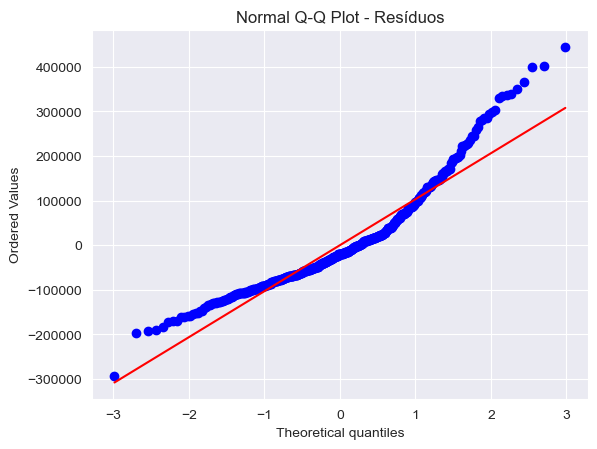

In [143]:
stats.probplot(residuos, dist='norm', plot=plt)
plt.title('Normal Q-Q Plot - Resíduos')
plt.show

## Análise da Homocedasticidade dos Resíduos
'Analisar a variação constante dos resíduos'

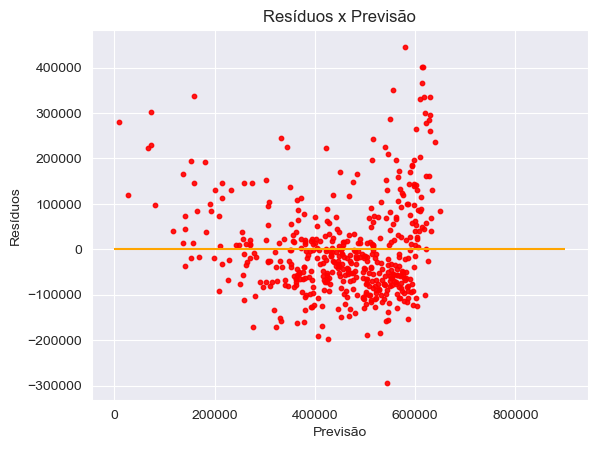

In [144]:
plt.scatter(y=residuos, x=regressao.predict(), color='red', s=10, alpha=0.9)
plt.hlines(y=0, xmin=0, xmax=900000, color= 'orange')
plt.title('Resíduos x Previsão')
plt.ylabel('Resíduos')
plt.xlabel('Previsão')
plt.show()

## Teste Breus-Pagan

In [145]:
"""
H0: Existe Homocedasticidade : p > 0,05
H1: Existe Heterocedasticidade : p <= 0,05
"""

'\nH0: Existe Homocedasticidade : p > 0,05\nH1: Existe Heterocedasticidade : p <= 0,05\n'

In [146]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [147]:
# noinspection SpellCheckingInspection
estatistica, p, f, fp = sms.het_breuschpagan(regressao.resid, regressao.model.exog)
print(f'Estatística: {estatistica}, P-valor: {p}, F-valor: {f}, FP-valor: {fp}')


Estatística: 5.38255336402662, P-valor: 0.020339089399133682, F-valor: 5.420200421872027, FP-valor: 0.02031369218146551


In [148]:
if p > 0.05:
    print('Existe Homocedasticidade')
else:
    print('Existe Heterocedasticidade')

Existe Heterocedasticidade


## Outliers nos resídos
'Entre -3 e 3'

In [149]:
outliers = regressao.outlier_test()

In [150]:
outliers.max()

student_resid    4.227468
unadj_p          0.999732
bonf(p)          1.000000
dtype: float64

In [151]:
outliers.min()

student_resid   -2.762057
unadj_p          0.000028
bonf(p)          0.013809
dtype: float64

In [152]:
outliers

student_resid   unadj_p  bonf(p)
0        -0.855242  0.392839      1.0
1        -0.635422  0.525452      1.0
2         1.083962  0.278919      1.0
3         0.648234  0.517140      1.0
4         1.595009  0.111360      1.0
..             ...       ...      ...
484      -0.391144  0.695862      1.0
485      -0.841215  0.400641      1.0
486      -0.765237  0.444502      1.0
487      -0.998342  0.318610      1.0
488      -2.762057  0.005961      1.0

[489 rows x 3 columns]

In [153]:
'Modelo Não Consistente'

'Modelo Não Consistente'

## Modelo de Regressão Linear

In [154]:
print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     668.7
Date:                Tue, 14 May 2024   Prob (F-statistic):           1.93e-93
Time:                        23:19:24   Log-Likelihood:                -6357.8
No. Observations:                 489   AIC:                         1.272e+04
Df Residuals:                     487   BIC:                         1.273e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.841e+05   1.01e+04     67.551      0.0

In [155]:
"""
Estatística t:
H0: coeficiente = 0 : p > 0,05 (coeficiente não válido)
H1: coeficiente != 0 : p <= 0,05 (coeficiente válido)
"""

'\nEstatística t:\nH0: coeficiente = 0 : p > 0,05 (coeficiente não válido)\nH1: coeficiente != 0 : p <= 0,05 (coeficiente válido)\n'

In [156]:
coefs = pd.DataFrame(regressao.params)
coefs.columns = ['Coeficientes']
coefs

Coeficientes
Intercept  684138.493068
x2         -17759.048327

## Equação da regressão linear
'Valor = 684138,49 - 17759,04 * LSTAT'

In [157]:
regressao.params

Intercept    684138.493068
x2           -17759.048327
dtype: float64

In [158]:
df.head()

RM  LSTAT  PTRATIO      MEDV
0  6.575   4.98     15.3  504000.0
1  6.421   9.14     17.8  453600.0
2  7.185   4.03     17.8  728700.0
3  6.998   2.94     18.7  701400.0
4  7.147   5.33     18.7  760200.0

In [159]:
regressao.predict()

array([595698.43239814, 521820.79135628, 612569.52830915, 631926.89098598,
       589482.76548356, 591613.85128285, 463393.52235923, 344052.7175993 ,
       152610.17663024, 380458.76667041, 320965.95477372, 448475.92176424,
       405143.84384545, 537448.75388437, 501930.65722963, 533719.35373562,
       567283.95507435, 423613.25410592, 476535.21812149, 483816.42793571,
       310843.29722712, 438530.85470091, 351689.10838007, 331088.61232032,
       394666.00533231, 390936.60518356, 421126.98734009, 377262.13797148,
       456822.6744781 , 471385.09410655, 282784.00086987, 452560.50287953,
       192035.26391701, 358259.9562612 , 322919.45008973, 512230.9052595 ,
       481507.75165315, 528391.63923741, 504239.33351218, 607419.40429421,
       648975.57738026, 598184.69916397, 580958.42228643, 552011.17351281,
       514539.58154206, 502818.60964599, 432847.95923615, 350268.38451388,
       136982.21410216, 396441.91016504, 445279.29306531, 516670.66734134,
       590370.71789993, 5

C:\Users\Nayan Couto\AppData\Local\Temp\ipykernel_56964\2976151201.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



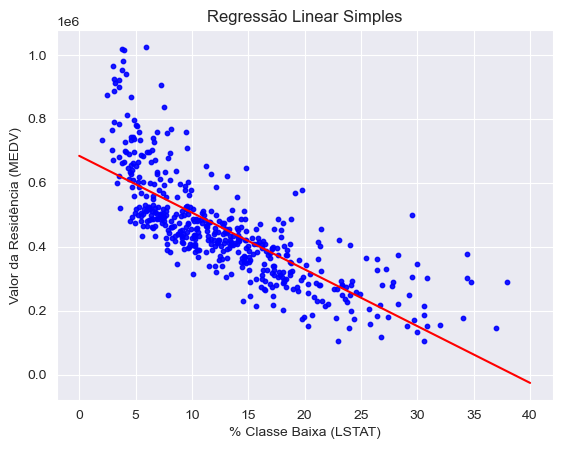

In [160]:
plt.scatter(y=df.MEDV, x=df.LSTAT, color='blue', s=10, alpha=0.9)
X_plot = np.linspace(0, 40)
plt.plot(X_plot, X_plot*regressao.params[1] + regressao.params[0], color='red')
plt.title('Regressão Linear Simples')
plt.ylabel('Valor da Residência (MEDV)')
plt.xlabel('% Classe Baixa (LSTAT)')
plt.show()

# 76. Regressão Linear Múltipla

In [161]:
## Regressão Linear Múltipla
"""
> Quando possém mais de uma variável independente.
    y = b0 + b1*x1 + b2*x2 + ... + bn*xn + e, onde:
    e = erro

> Utiliza-se um método dos mínimos quadrados para estimar os coeficientes da regressão múltipla, sendo que o ideal é usar a tecnologia.
> Após a obtenção dos coeficientes e, consequentemente, a equação de regressão linear múltipla, aí sim será possível a realização das previsões.

Pressupostos
> Relação linear entre as variáveis independentes e dependentes.
> Sem presença de outliers na análise dos resíduos.
> Passar no teste de homocedasticidade.
> Resíduos normalmente distribuídos com média 0 e variância constante.
> Ausência de multicolinearidade e autocorrelação.
"""

'\n> Quando possém mais de uma variável independente.\n    y = b0 + b1*x1 + b2*x2 + ... + bn*xn + e, onde:\n    e = erro\n\n> Utiliza-se um método dos mínimos quadrados para estimar os coeficientes da regressão múltipla, sendo que o ideal é usar a tecnologia.\n> Após a obtenção dos coeficientes e, consequentemente, a equação de regressão linear múltipla, aí sim será possível a realização das previsões.\n\nPressupostos\n> Relação linear entre as variáveis independentes e dependentes.\n> Sem presença de outliers na análise dos resíduos.\n> Passar no teste de homocedasticidade.\n> Resíduos normalmente distribuídos com média 0 e variância constante.\n> Ausência de multicolinearidade e autocorrelação.\n'

# 77. Regressão Linear Múltipla no Python

In [162]:
from sklearn.linear_model import LinearRegression
df.head(2)

RM  LSTAT  PTRATIO      MEDV
0  6.575   4.98     15.3  504000.0
1  6.421   9.14     17.8  453600.0

In [163]:
independente = df.iloc[:, 0:3].values
independente

array([[ 6.575,  4.98 , 15.3  ],
       [ 6.421,  9.14 , 17.8  ],
       [ 7.185,  4.03 , 17.8  ],
       ...,
       [ 6.976,  5.64 , 21.   ],
       [ 6.794,  6.48 , 21.   ],
       [ 6.03 ,  7.88 , 21.   ]])

In [164]:
independente.shape

(489, 3)

In [165]:
dependente = df.iloc[:, 3].values
dependente


array([ 504000.,  453600.,  728700.,  701400.,  760200.,  602700.,
        480900.,  569100.,  346500.,  396900.,  315000.,  396900.,
        455700.,  428400.,  382200.,  417900.,  485100.,  367500.,
        424200.,  382200.,  285600.,  411600.,  319200.,  304500.,
        327600.,  291900.,  348600.,  310800.,  386400.,  441000.,
        266700.,  304500.,  277200.,  275100.,  283500.,  396900.,
        420000.,  441000.,  518700.,  646800.,  732900.,  558600.,
        531300.,  518700.,  445200.,  405300.,  420000.,  348600.,
        302400.,  407400.,  413700.,  430500.,  525000.,  491400.,
        396900.,  743400.,  518700.,  663600.,  489300.,  411600.,
        392700.,  336000.,  466200.,  525000.,  693000.,  493500.,
        407400.,  462000.,  365400.,  438900.,  508200.,  455700.,
        478800.,  491400.,  506100.,  449400.,  420000.,  436800.,
        445200.,  426300.,  588000.,  501900.,  520800.,  480900.,
        501900.,  558600.,  472500.,  466200.,  495600.,  6027

In [166]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size=0.3, random_state=0)

In [167]:
x_treino.shape, y_treino.shape

((342, 3), (342,))

In [168]:
multipla = LinearRegression()
multipla.fit(x_treino, y_treino)

LinearRegression()

In [169]:
multipla.intercept_

434789.45509552216

In [170]:
multipla.coef_

array([ 85325.36412937, -10775.41479323, -20133.58779106])

In [171]:
print(f'Equação: Valor = {multipla.intercept_ :.2f} + {multipla.coef_[0] :.2f} * RM + {multipla.coef_[1] :.2f} * LSTAT + {multipla.coef_[2] :.2f} * PTRATIO')

Equação: Valor = 434789.46 + 85325.36 * RM + -10775.41 * LSTAT + -20133.59 * PTRATIO


In [172]:
# Coeficiente de determinação
multipla.score(x_treino, y_treino)

0.7343049403294957

## Teste

In [173]:
previsoes = multipla.predict(x_teste)
previsoes

array([418504.52251533, 682498.59311161, 310842.03220354, 399602.67212048,
       529013.04970446, 364349.16756502, 241564.07559959, 413075.10184459,
       476051.89023052, 371925.92192458, 324382.18849665, 357068.87403347,
       472650.96518839,  52625.76046357, 486476.7874084 , 312653.08514703,
       465067.60969605, 614663.51972717, 383059.21254559, 653229.85415898,
       677008.34036381, 653364.33988067,  15201.46316315, 452877.56192735,
       360692.75896586, 754677.40725013, 714803.22773316, 754640.19558449,
       430756.93101727, 422579.57707332, 378309.3992427 , 461958.22362764,
       472103.18520444, 681780.56381622, 457070.41410848, 769207.31373834,
       520822.33816699, 261675.315203  , 503180.52774604, 590132.54786611,
       324624.03541901, 452521.53520288, 400704.94316867, 498314.39406844,
       280336.01343561, 365481.99718596, 525798.46427921, 361547.63013434,
       716795.14226269, 407424.79029782, 679886.98036124, 445827.68346551,
       614892.98134094, 3

In [174]:
y_teste

array([ 417900.,  632100.,  281400.,  577500.,  474600.,  359100.,
        247800.,  474600.,  449400.,  411600.,  214200.,  214200.,
        428400.,  375900.,  577500.,  327600.,  420000.,  489300.,
        470400.,  640500.,  651000.,  690900.,  147000.,  441000.,
        367500.,  966000.,  756000.,  888300.,  455700.,  445200.,
        323400.,  455700.,  430500.,  867300.,  445200.,  875700.,
        415800.,  268800.,  590100.,  497700.,  231000.,  315000.,
        388500.,  449400.,  413700.,  352800.,  453600.,  306600.,
        898800.,  514500.,  743400.,  474600.,  600600.,  304500.,
        661500.,  489300.,  422100.,  184800.,  525000.,  249900.,
        407400.,  361200.,  428400.,  392700.,  428400.,  472500.,
        258300.,  550200.,  346500.,  199500.,  302400.,  611100.,
        396900.,  585900.,  279300.,  483000.,  462000.,  218400.,
        518700.,  420000.,  392700.,  980700.,  455700.,  514500.,
        480900.,  520800.,  485100.,  525000.,  390600.,  5691

In [175]:
# Coeficiente de determinação
multipla.score(x_teste, y_teste)

0.6817814124380092

In [176]:
# Fazendo previsões para valores distintos
valor_casa = multipla.predict([[6, 20, 15]])
valor_casa

array([429229.52714127])

## Métricas

In [177]:
# Erro absoluto
abs(y_teste - previsoes). mean()

71651.46435650406

In [178]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [179]:
# Erro médio absoluto
mean_absolute_error(y_teste, previsoes)

71651.46435650406

In [180]:
# Erro quadrático medio
mean_squared_error(y_teste, previsoes)

9232768512.15146

In [181]:
# Raiz do erro quadrático medio
np.sqrt(mean_squared_error(y_teste, previsoes))

96087.2963099257

## Validação Cruzada

In [182]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [183]:
# Separando os dados em folds
kfold = KFold(n_splits=15, shuffle=True, random_state=5)

In [184]:
# Criando o Modelo
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
resultados = cross_val_score(modelo, independente, dependente, cv=kfold)
resultados

array([0.83061794, 0.77028683, 0.46606666, 0.81532627, 0.79492754,
       0.60625828, 0.82164061, 0.7750116 , 0.58744519, 0.74753069,
       0.76227037, 0.51253844, 0.71206526, 0.73425176, 0.45176491])

In [185]:
# Média e desvio padrão
print(f'''Média: {resultados.mean()} | Desvio Padrão: {resultados.std()}''')

Média: 0.6925334896490515 | Desvio Padrão: 0.1276188433363462


In [186]:
print(f'Coeficiente de determinação: {resultados.mean() * 100:.2f}%')

Coeficiente de determinação: 69.25%


## Regressão Linear Simples: R^2 = 0,57/0,60; RMSE = 99315,5; Validação Cruzada = 55,97%
## Regressão Linear Múltipla: R^2 = 0,73/0,68; RMSE = 96087,3; Validação Cruzada = 69,25%

# 78. Avaliação da Regressão Linear Múltipla no Statsmodels

## Avaliando a Regressão Linear Múltipla com Statsmodels

In [187]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [188]:
df.head()

RM  LSTAT  PTRATIO      MEDV
0  6.575   4.98     15.3  504000.0
1  6.421   9.14     17.8  453600.0
2  7.185   4.03     17.8  728700.0
3  6.998   2.94     18.7  701400.0
4  7.147   5.33     18.7  760200.0

In [189]:
modelo = smf.ols(formula='MEDV ~ RM + LSTAT + PTRATIO', data=df).fit()

In [190]:
residuos = modelo.resid
residuos

0     -128371.739762
1      -71577.148313
2       81946.881920
3       76551.704130
4      148383.407464
           ...      
484     -1541.448492
485     -4797.202628
486    -46918.775678
487    -61950.456779
488   -192725.539836
Length: 489, dtype: float64

## Teste de Normalidade dos Resíduos

In [191]:
import scipy.stats as stats

In [192]:
"""
H0: distribuição dos resíduos é normal : p > 0,05
H1: distribuição dos resíduos não é normal : p <= 0,05
"""

'\nH0: distribuição dos resíduos é normal : p > 0,05\nH1: distribuição dos resíduos não é normal : p <= 0,05\n'

In [193]:
estatistica, p = stats.shapiro(residuos)
print(f'Estatística: {estatistica}, P-valor: {p}')

Estatística: 0.9633502378521365, P-valor: 1.0878482489574668e-09


In [194]:
import matplotlib.pyplot as plt

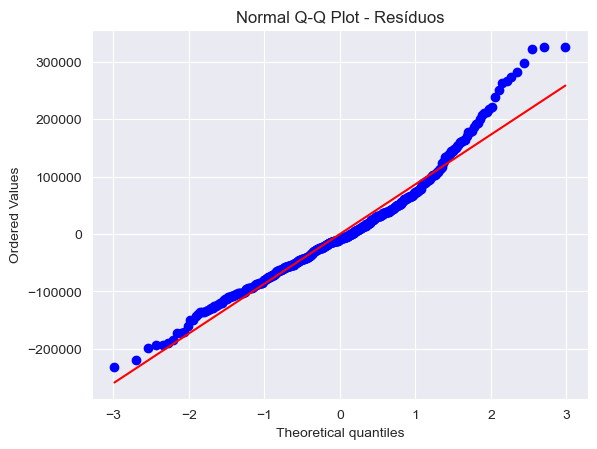

In [195]:
stats.probplot(residuos, dist='norm', plot=plt)
plt.title("Normal Q-Q Plot - Resíduos")
plt.show()

## Análise da Homocedasticidade dos resíduos

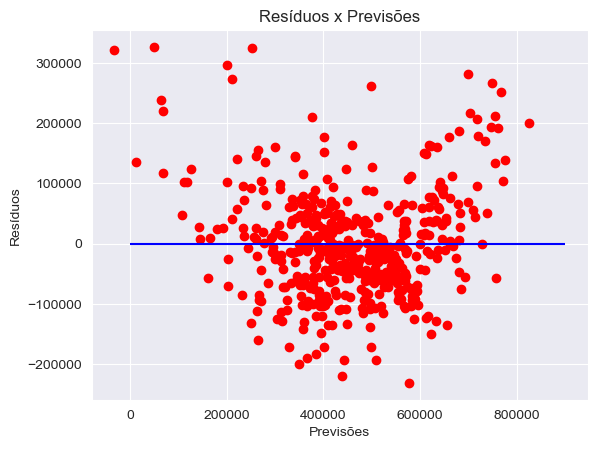

In [196]:
plt.scatter(y=residuos, x=modelo.predict(), color='red')
plt.hlines(y=0, xmin=0, xmax=900000, color='blue')
plt.title("Resíduos x Previsões")
plt.ylabel("Resíduos")
plt.xlabel("Previsões")
plt.show()

## Teste Breusch-Pagan

In [197]:
"""
H0: existe homocedasticidade : p > 0,05
H1: existe heterocedasticidade (!) : p <= 0,05
"""

'\nH0: existe homocedasticidade : p > 0,05\nH1: existe heterocedasticidade (!) : p <= 0,05\n'

In [198]:
from statsmodels.compat import lzip

In [199]:
estatistica, p, f, fp = sms.het_breuschpagan(modelo.resid, modelo.model.exog)
print(f'Estatística: {estatistica : .3f}, P-valor: {p : .3f}, F-valor: {f : .3f}, fp-valor: {fp : .3f}')

Estatística:  14.867, P-valor:  0.002, F-valor:  5.069, fp-valor:  0.002


## Outliers nos resíduos
'Entre -3 e 3'

In [200]:
outliers = modelo.outlier_test()

In [201]:
outliers.max()

student_resid    3.887418
unadj_p          0.999502
bonf(p)          1.000000
dtype: float64

In [202]:
outliers.min()

student_resid   -2.648018
unadj_p          0.000115
bonf(p)          0.056456
dtype: float64

## Ausência de Multicolinearidade

In [203]:
"""
Somente entre as variáveis independentes.
Considerada multicolinearidade quando r> 0.9
"""

'\nSomente entre as variáveis independentes.\nConsiderada multicolinearidade quando r> 0.9\n'

In [204]:
variaveis = df[['RM', 'LSTAT', 'PTRATIO']]

In [205]:
variaveis.head()

RM  LSTAT  PTRATIO
0  6.575   4.98     15.3
1  6.421   9.14     17.8
2  7.185   4.03     17.8
3  6.998   2.94     18.7
4  7.147   5.33     18.7

In [206]:
correlacoes = variaveis.corr(method='pearson')
correlacoes

RM     LSTAT   PTRATIO
RM       1.000000 -0.612033 -0.304559
LSTAT   -0.612033  1.000000  0.360445
PTRATIO -0.304559  0.360445  1.000000

In [207]:
## Análise do Modelo

In [208]:
"""
Intercept
p_valor para cada coeficiente < 0,05
Adjusted R-Quared (explicação do modelo através dos dados)
p_valor da estatística F < 0,05 (valida o modelo de regressão)
"""

'\nIntercept\np_valor para cada coeficiente < 0,05\nAdjusted R-Quared (explicação do modelo através dos dados)\np_valor da estatística F < 0,05 (valida o modelo de regressão)\n'

In [209]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     410.9
Date:                Tue, 14 May 2024   Prob (F-statistic):          9.96e-133
Time:                        23:19:56   Log-Likelihood:                -6259.9
No. Observations:                 489   AIC:                         1.253e+04
Df Residuals:                     485   BIC:                         1.254e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.155e+05   6.88e+04      6.035      0.0

## Equação: Valor da casa = 4.155e+05 + 8.657e+04 * RM + -1.085e+04 * LSTAT -1.949e+04 * PTRATIO

In [210]:
# Criando uma coluna com previsão
df['previsao'] = modelo.fittedvalues

In [211]:
df.head()

RM  LSTAT  PTRATIO      MEDV       previsao
0  6.575   4.98     15.3  504000.0  632371.739762
1  6.421   9.14     17.8  453600.0  525177.148313
2  7.185   4.03     17.8  728700.0  646753.118080
3  6.998   2.94     18.7  701400.0  624848.295870
4  7.147   5.33     18.7  760200.0  611816.592536

In [212]:
import seaborn as sns

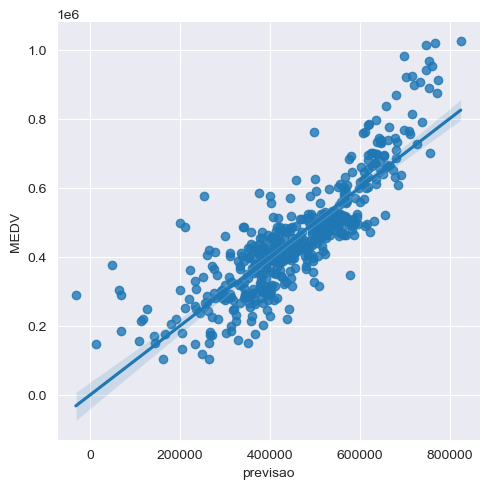

In [213]:
sns.lmplot(x='previsao', y='MEDV', data=df)

# 79. Regressão Polinomial: teoria

In [215]:
"""
Regressão Polinomial
> Ajuste de uma equação não linear por meio de funções polinomiais de variável independente.
    y = b0 + b1*x1 + b2*x2^2 + ... + bn*xn^n + e, onde:
    e = erro
    b0 = intercepto
    b1 = coeficiente angular
    b2 = coeficiente quadratico
    b3 = coeficiente cubico
    bn = coeficiente n-esimo

Ponto Crítico
> Pontos de máximo e mínimo da função.
    dy/dx = 0 (calculo de derivada da função da regressão polinomial)
"""

'\nRegressão Polinomial\n> Ajuste de uma equação não linear por meio de funções polinomiais de variável independente.\n    y = b0 + b1*x1 + b2*x2^2 + ... + bn*xn^n + e, onde:\n    e = erro\n    b0 = intercepto\n    b1 = coeficiente angular\n    b2 = coeficiente quadratico\n    b3 = coeficiente cubico\n    bn = coeficiente n-esimo\n\nPonto Crítico\n> Pontos de máximo e mínimo da função.\n    dy/dx = 0 (calculo de derivada da função da regressão polinomial)\n'

# 80. Regressão Polinomial no Python

In [216]:
"https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html"

'https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html'

## Valor médio (MEDV) em função do número de cômodos (RM)

In [217]:
df.head(2)

RM  LSTAT  PTRATIO      MEDV       previsao
0  6.575   4.98     15.3  504000.0  632371.739762
1  6.421   9.14     17.8  453600.0  525177.148313

In [218]:
x1 = df.iloc[:, 0:1]. values
x1

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147],
       [6.43 ],
       [6.012],
       [6.172],
       [5.631],
       [6.004],
       [6.377],
       [6.009],
       [5.889],
       [5.949],
       [6.096],
       [5.834],
       [5.935],
       [5.99 ],
       [5.456],
       [5.727],
       [5.57 ],
       [5.965],
       [6.142],
       [5.813],
       [5.924],
       [5.599],
       [5.813],
       [6.047],
       [6.495],
       [6.674],
       [5.713],
       [6.072],
       [5.95 ],
       [5.701],
       [6.096],
       [5.933],
       [5.841],
       [5.85 ],
       [5.966],
       [6.595],
       [7.024],
       [6.77 ],
       [6.169],
       [6.211],
       [6.069],
       [5.682],
       [5.786],
       [6.03 ],
       [5.399],
       [5.602],
       [5.963],
       [6.115],
       [6.511],
       [5.998],
       [5.888],
       [7.249],
       [6.383],
       [6.816],
       [6.145],
       [5.927],
       [5.741],
       [5.966],
       [

In [220]:
y = df.iloc[:, 3]. values
y

array([ 504000.,  453600.,  728700.,  701400.,  760200.,  602700.,
        480900.,  569100.,  346500.,  396900.,  315000.,  396900.,
        455700.,  428400.,  382200.,  417900.,  485100.,  367500.,
        424200.,  382200.,  285600.,  411600.,  319200.,  304500.,
        327600.,  291900.,  348600.,  310800.,  386400.,  441000.,
        266700.,  304500.,  277200.,  275100.,  283500.,  396900.,
        420000.,  441000.,  518700.,  646800.,  732900.,  558600.,
        531300.,  518700.,  445200.,  405300.,  420000.,  348600.,
        302400.,  407400.,  413700.,  430500.,  525000.,  491400.,
        396900.,  743400.,  518700.,  663600.,  489300.,  411600.,
        392700.,  336000.,  466200.,  525000.,  693000.,  493500.,
        407400.,  462000.,  365400.,  438900.,  508200.,  455700.,
        478800.,  491400.,  506100.,  449400.,  420000.,  436800.,
        445200.,  426300.,  588000.,  501900.,  520800.,  480900.,
        501900.,  558600.,  472500.,  466200.,  495600.,  6027

In [223]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x1, y, test_size=0.3, random_state=0)

In [224]:
x_treino.shape, y_treino.shape

((342, 1), (342,))

In [225]:
x_teste.shape, y_teste.shape

((147, 1), (147,))

In [226]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

## Pré Processamento

In [227]:
grau_polinomial = PolynomialFeatures(degree=2)

In [228]:
x_poly = grau_polinomial.fit_transform(x_treino)
x_poly

array([[ 1.      ,  6.266   , 39.262756],
       [ 1.      ,  6.951   , 48.316401],
       [ 1.      ,  6.619   , 43.811161],
       ...,
       [ 1.      ,  6.021   , 36.252441],
       [ 1.      ,  6.03    , 36.3609  ],
       [ 1.      ,  6.02    , 36.2404  ]])

In [229]:
polinomial = LinearRegression()

In [230]:
polinomial.fit(x_poly, y_treino)

LinearRegression()

In [231]:
previsoes_treino = polinomial.predict(x_poly)
previsoes_treino

array([ 437110.58237193,  591725.80768385,  509745.59819603,
        346008.10496333,  513392.62352783,  416852.5911264 ,
        315183.66162338,  446679.04707807,  373588.39680381,
        316505.75601425,  599515.83892672,  552797.23747686,
        651004.9744274 ,  410613.36635852,  514997.87201756,
        393649.7140236 ,  373314.47900132,  447060.6508027 ,
        368864.24220229,  468177.30995355,  543432.2286348 ,
        540510.9129758 ,  512021.38347297,  434355.81971117,
       1103722.24594251,  626870.88716593,  390298.17672663,
        445727.14100714,  427141.98964823,  763035.64245679,
        385086.07029037,  498105.25326763,  296758.81351283,
        471453.20344652,  327050.02233381,  413122.9512501 ,
        402603.8394098 ,  411781.14078952,  663687.4942574 ,
        409451.48100139,  340124.60654078,  405349.96451258,
        443643.52394704,  362497.7668626 ,  466348.14069662,
        387450.47937087,  420640.40063029,  548093.03963066,
        357514.57375844,

In [232]:
# Intercepto
polinomial.intercept_

1640107.008583629

In [234]:
# Coeficiente
polinomial.coef_

array([      0.        , -568528.11104731,   60092.59048475])

## Equação
'valor = 1640107 - 568528.11*RM + 60092.59*RM^2'

In [237]:
numeros = np.linspace(3, 9.84, 342)

In [238]:
numeros.shape

(342,)

In [239]:
RM = numeros

In [241]:
valor = 1640107 - 568528.11*RM + 60092.59*RM**2

In [242]:
import matplotlib.pyplot as plt

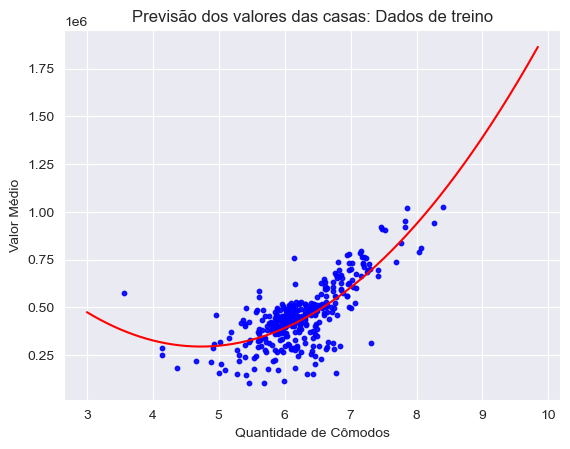

In [243]:
plt.scatter(x_treino, y_treino, c='blue', s=10, alpha=0.9)
plt.xlabel('Quantidade de Cômodos')
plt.ylabel('Valor Médio')
plt.title('Previsão dos valores das casas: Dados de treino')
plt.plot(numeros, valor, color='red')
plt.show()

## Previsões para cômodos distintos

In [244]:
comodos = 9
valor = 1640107 - 568528.11*comodos + 60092.59*comodos**2
valor

1390853.7999999998

## Coeficiente de Determinação dados de treino

In [245]:
polinomial.score(x_poly, y_treino)

0.5864656525780778

## Teste

In [246]:
numeros2 = np.linspace(3, 8.88, 147)

In [247]:
numeros2.shape

(147,)

In [248]:
RM2 = numeros2

In [249]:
valor2 = 1640107 - 568528.11*RM2 + 60092.59*RM2**2

In [250]:
import matplotlib.pyplot as plt

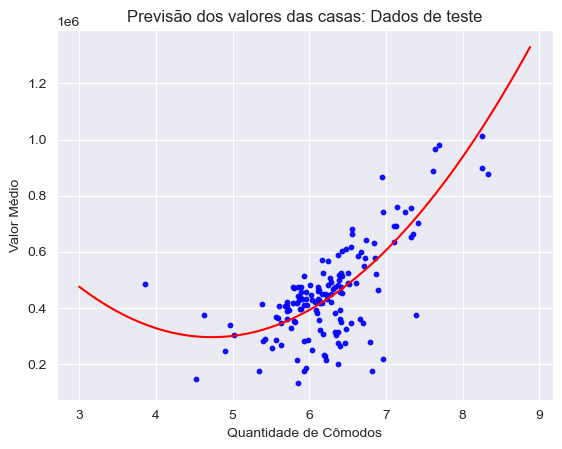

In [251]:
plt.scatter(x_teste, y_teste, c='blue', s=10, alpha=0.9)
plt.xlabel('Quantidade de Cômodos')
plt.ylabel('Valor Médio')
plt.title('Previsão dos valores das casas: Dados de teste')
plt.plot(numeros2, valor2, color='red')
plt.show()

In [252]:
x_poly_teste = grau_polinomial.fit_transform(x_teste)
x_poly_teste

array([[ 1.      ,  5.834   , 34.035556],
       [ 1.      ,  6.842   , 46.812964],
       [ 1.      ,  5.403   , 29.192409],
       [ 1.      ,  6.852   , 46.949904],
       [ 1.      ,  6.417   , 41.177889],
       [ 1.      ,  6.406   , 41.036836],
       [ 1.      ,  4.903   , 24.039409],
       [ 1.      ,  6.112   , 37.356544],
       [ 1.      ,  6.163   , 37.982569],
       [ 1.      ,  5.965   , 35.581225],
       [ 1.      ,  6.223   , 38.725729],
       [ 1.      ,  5.837   , 34.070569],
       [ 1.      ,  6.041   , 36.493681],
       [ 1.      ,  4.628   , 21.418384],
       [ 1.      ,  6.727   , 45.252529],
       [ 1.      ,  5.757   , 33.143049],
       [ 1.      ,  6.279   , 39.425841],
       [ 1.      ,  6.51    , 42.3801  ],
       [ 1.      ,  5.807   , 33.721249],
       [ 1.      ,  6.739   , 45.414121],
       [ 1.      ,  7.327   , 53.684929],
       [ 1.      ,  7.135   , 50.908225],
       [ 1.      ,  4.519   , 20.421361],
       [ 1.      ,  5.85    , 34.2

In [253]:
polinomial_teste = LinearRegression()

In [254]:
polinomial_teste.fit(x_poly_teste, y_teste)

LinearRegression()

## Coeficiente de determinação dos dados de teste

In [256]:
polinomial_teste.score(x_poly_teste, y_teste)

0.5467915833022094

In [257]:
previsoes_teste = polinomial_teste.predict(x_poly_teste)
previsoes_teste

array([ 366162.92266295,  543592.12400919,  327833.4072188 ,
        545968.43616553,  453787.64174526,  451753.54823481,
        311540.04816783,  402814.67708243,  410554.03872501,
        382268.62392699,  420062.23865056,  366508.51552605,
        392564.50289741,  315477.19789656,  517134.5208264 ,
        357665.51402072,  429329.7017499 ,  471570.33504319,
        363101.60874954,  519820.51048329,  672785.7447366 ,
        618236.3950692 ,  319570.89981994,  368018.67292755,
        339933.74087388,  772948.36976603,  674562.31063362,
        761324.7228733 ,  449734.10075991,  389512.21815974,
        466687.15577228,  372671.88133068,  420549.08707955,
        568149.12353463,  421526.05206117, 1033211.52422107,
        407633.95048141,  344947.85463318,  446099.90097922,
        449368.50203275,  415253.66996058,  446461.1422082 ,
        352631.72762613,  430514.82431365,  327026.62264797,
        362655.58534256,  454530.94336118,  413989.78330222,
       1000977.04138409,

## Métricas

In [258]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [259]:
# Erro médio absoluto
mean_absolute_error(y_teste, previsoes_teste)

88894.00551287523

In [260]:
# Erro quadrático medio
mean_squared_error(y_teste, previsoes_teste)

13149352560.413332

In [261]:
# Raiz do erro quadrático medio
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

114670.62640630046

In [262]:
# Erro absoluto
abs(y_teste - previsoes_teste).mean()

88894.00551287523

## Resultados:
**REGRESSÃO LINEAR SIMPLES:** R^2 = 0,57/0,60; RMSE = 99315,5; Validação Cruzada = 55,97%;
**REGRESSÃO LINEAR MÚLTIPLA:** R^2 = 0,73/0,68; RMSE = 96087,3; Validação Cruzada = 69,25%
**REGRESSÃO POLINOMIAL:** R^2 = 0,59/0,54; RMSE = 114670,6;